<a href="https://colab.research.google.com/github/jermanalopes/MachineLearningBasic/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import confusion_matrix

In [90]:
#Database informations
database = pd.read_csv('insurance.csv')
database = database.drop(columns=['Unnamed: 0'])
#database = database.dropna()
database = database.replace(np.nan, 'None')
database


,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [91]:
#Data pre-processing
y = database.iloc[:, 7].values
x = database.iloc[:, [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

label_encoder = LabelEncoder()
for i in range(x.shape[1]):
  if x[:,i].dtype == 'object':
    x[:,i] = label_encoder.fit_transform(x[:,i])


In [92]:
# Training and Test data
x_training, x_test, y_training, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
y

array(['Mild', 'None', 'None', ..., 'None', 'None', 'None'], dtype=object)

In [93]:
#Naive Bayes Model
model = GaussianNB()
model.fit(x_training, y_training)
predict = model.predict(x_test)


Acc: 0.8371666666666666, Precison: [0.68267581 0.34823977 0.97525439 1.        ], Recall: 0.8371666666666666, f1: 0.811688061195133
              precision    recall  f1-score   support

        Mild       0.68      0.73      0.71       542
    Moderate       0.35      0.72      0.47       505
        None       0.98      1.00      0.99      4228
      Severe       1.00      0.06      0.11       725

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.57      6000
weighted avg       0.90      0.84      0.81      6000



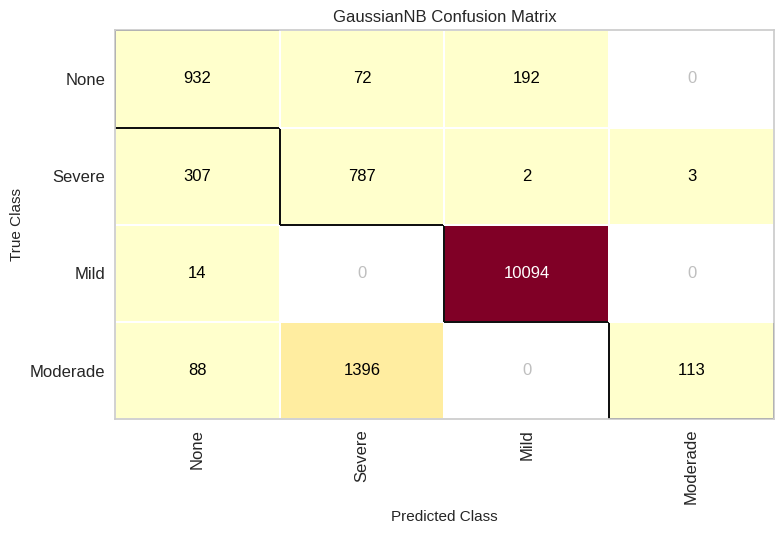

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [94]:
#Metrics
acc = accuracy_score(y_test, predict)
precison = precision_score(y_test, predict, average=None)
recall = recall_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')
print(f'Acc: {acc}, Precison: {precison}, Recall: {recall}, f1: {f1}')

report = classification_report(y_test, predict)
print(report)

c_matrix = confusion_matrix(model, classes=['None', 'Severe', 'Mild', 'Moderade'], X_train=x_training, y_train=y_training)
c_matrix.fit(x_training, y_training)
c_matrix.score(x_test, y_test)
c_matrix.poof()